In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Liabries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore


#Load Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Capestone /Insurance claim dataset/insurance_claims.csv')

In [ ]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


#Exploratory Data Analysis

In [ ]:
#Count of columns and rows
df.shape

(1000, 40)

In [ ]:
#
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
# Finding Missing Values:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
# Dropping _c39 column
df.drop('_c39',axis=1,inplace=True)

In [ ]:
# Checking null values after dropping _c39 column:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [ ]:
#Checking unique value:
df.nunique().to_frame('No of Uniqe Vlaues')

,No of Uniqe Vlaues
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


# Data Visualization

<ipython-input-14-42ab345b46c2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


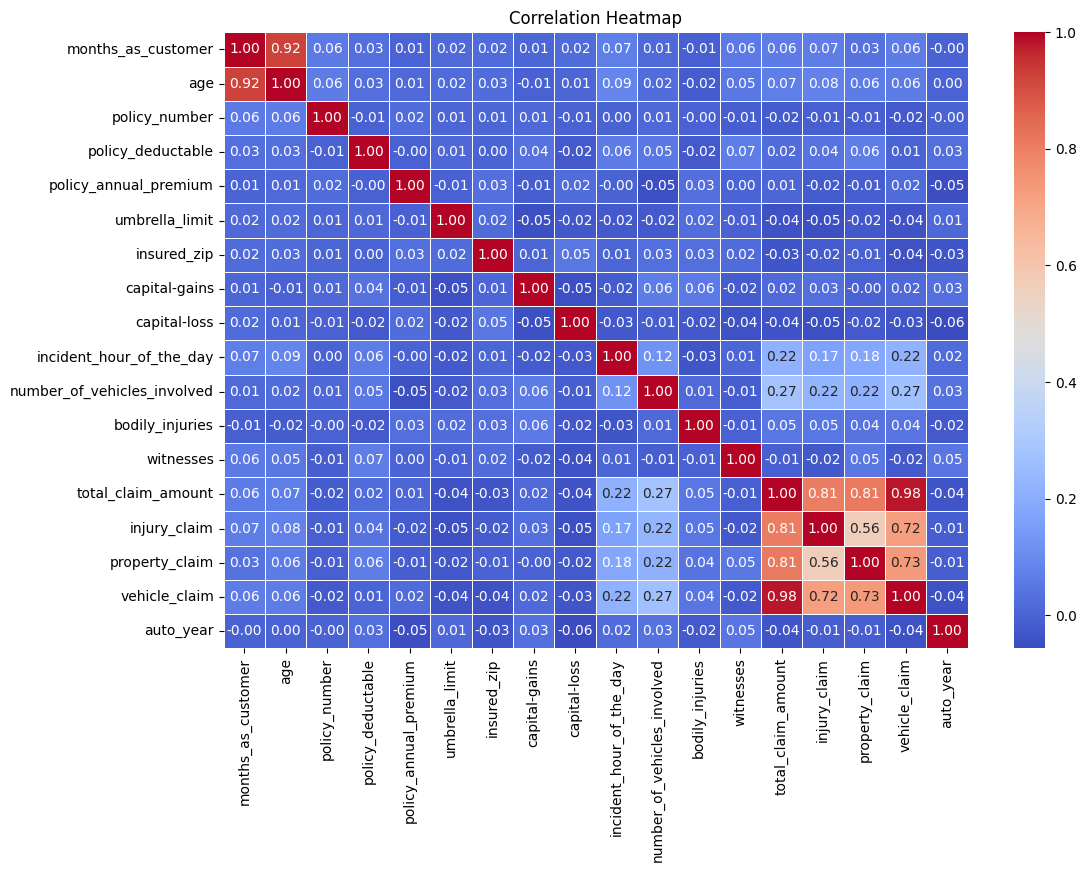

In [ ]:
# Visualizating data with use of HeatMap:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [ ]:
# Dropping policy_number and incident_location:
df.drop('policy_number',axis=1,inplace=True)
df.drop('incident_location',axis=1,inplace=True)

In [ ]:
# checking the value counts of each columns:
for i in df.columns:
  print(df[i].value_counts())
  print('*'*60)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
************************************************************
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
************************************************************
2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64
************************************************************
OH

In [ ]:
# Droping umbrella_limit and insured_zip column
df.drop('umbrella_limit',axis=1,inplace=True)
df.drop('insured_zip',axis=1,inplace=True)

In [ ]:
# Converting date columns from object type into date and time data type:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [ ]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                          object
incident_hour_of_the_day          

In [ ]:
# Extracting Day, Month and Year column from Policy_bind_date:
df['policy_bind_Day']=df['policy_bind_date'].dt.day
df['policy_bind_Month']=df['policy_bind_date'].dt.month
df['policy_bind_Year']=df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from Incident_date:
df['incident_Day']=df['incident_date'].dt.day
df['incident_Month']=df['incident_date'].dt.month
df['incident_Year']=df['incident_date'].dt.year

In [ ]:
# Droping Policy_bind_date and Incident_date:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [ ]:
# Checking which columns has "?" sign
df[df.columns[(df=='?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [ ]:
# Checking mode of the below columns:
print('The mode of collision_type is :',df['collision_type'].mode())
print('The mode of property_damage is:',df['property_damage'].mode())
print('The mode of police_report_available is:',df['police_report_available'].mode())

The mode of collision_type is : 0    Rear Collision
Name: collision_type, dtype: object
The mode of property_damage is: 0    ?
Name: property_damage, dtype: object
The mode of police_report_available is: 0     ?
1    NO
Name: police_report_available, dtype: object


In [ ]:
# Checking value count of poperty_damage and police_report_available column:
print('The value count of property_damage:\n',df['property_damage'].value_counts())
print('The value count of police_report_avaialble:\n',df['police_report_available'].value_counts())

The value count of property_damage:
 ?      360
NO     338
YES    302
Name: property_damage, dtype: int64
The value count of police_report_avaialble:
 ?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


In [ ]:
from pickle import FALSE
# Replacing "?" by their mode values
df['collision_type'] = df['collision_type'].str.replace('?', df['collision_type'].mode()[0], regex=False)
df['property_damage'] = df['property_damage'].str.replace('?', 'NO', regex=False)
df['police_report_available'] = df['police_report_available'].str.replace('?', 'NO', regex=False)

In [ ]:
# checking value count again
print ('The value count of collision_type:\n',df['collision_type'].value_counts())
print('\n')
print('The value count of property_damage:\n',df['property_damage'].value_counts())
print('\n')
print('The value count police_report_available:n',df['police_report_available'].value_counts())

The value count of collision_type:
 Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


The value count of property_damage:
 NO     698
YES    302
Name: property_damage, dtype: int64


The value count police_report_available:n NO     686
YES    314
Name: police_report_available, dtype: int64


In [ ]:
# Extracting csl_per_person and csl_per_accident from policy_csl column
df['csl_per_person']=df.policy_csl.str.split('/',expand=True)[0]
df['csl_per_accident']=df.policy_csl.str.split('/',expand=True)[1]

In [ ]:
# converting obejct data type into integer data type
df['csl_per_person']=df['csl_per_person'].astype('int64')
df['csl_per_accident']=df['csl_per_accident'].astype('int64')

In [ ]:
# Let's extract age of the vehicle from auto_year by subtracting it from the year 2018:
df['vehicle_Age']=2018-df['auto_year']
df.drop('auto_year',axis=1,inplace =True)

In [ ]:
df.drop('incident_Year',axis=1,inplace=True)

In [ ]:
# Seprating numerical and categorical columns:
# checking for categorical columns

categorical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)

print('Categorical columns are:\n', categorical_col)

Categorical columns are:
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [ ]:
numerical_col=[]
for i in df.dtypes.index:
  if df.dtypes[i]!='object':
    numerical_col.append(i)
print('Numerical columns are:\n',numerical_col)

Numerical columns are:
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_Day', 'policy_bind_Month', 'policy_bind_Year', 'incident_Day', 'incident_Month', 'csl_per_person', 'csl_per_accident', 'vehicle_Age']


In [ ]:
# Checking the list of counts of traget
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
# checking the unique values in traget column
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
insured_sex,1000,2,FEMALE,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_education_level,1000,7,JD,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_occupation,1000,14,machine-op-inspct,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_hobbies,1000,20,reading,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization:

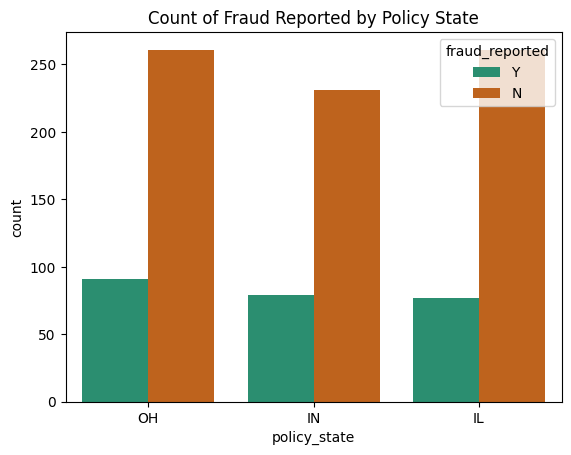

In [ ]:
# Comparing policy_state and fraud_reported
sns.countplot(x='policy_state', hue='fraud_reported', data=df, palette='Dark2')
plt.title('Count of Fraud Reported by Policy State')
plt.show()

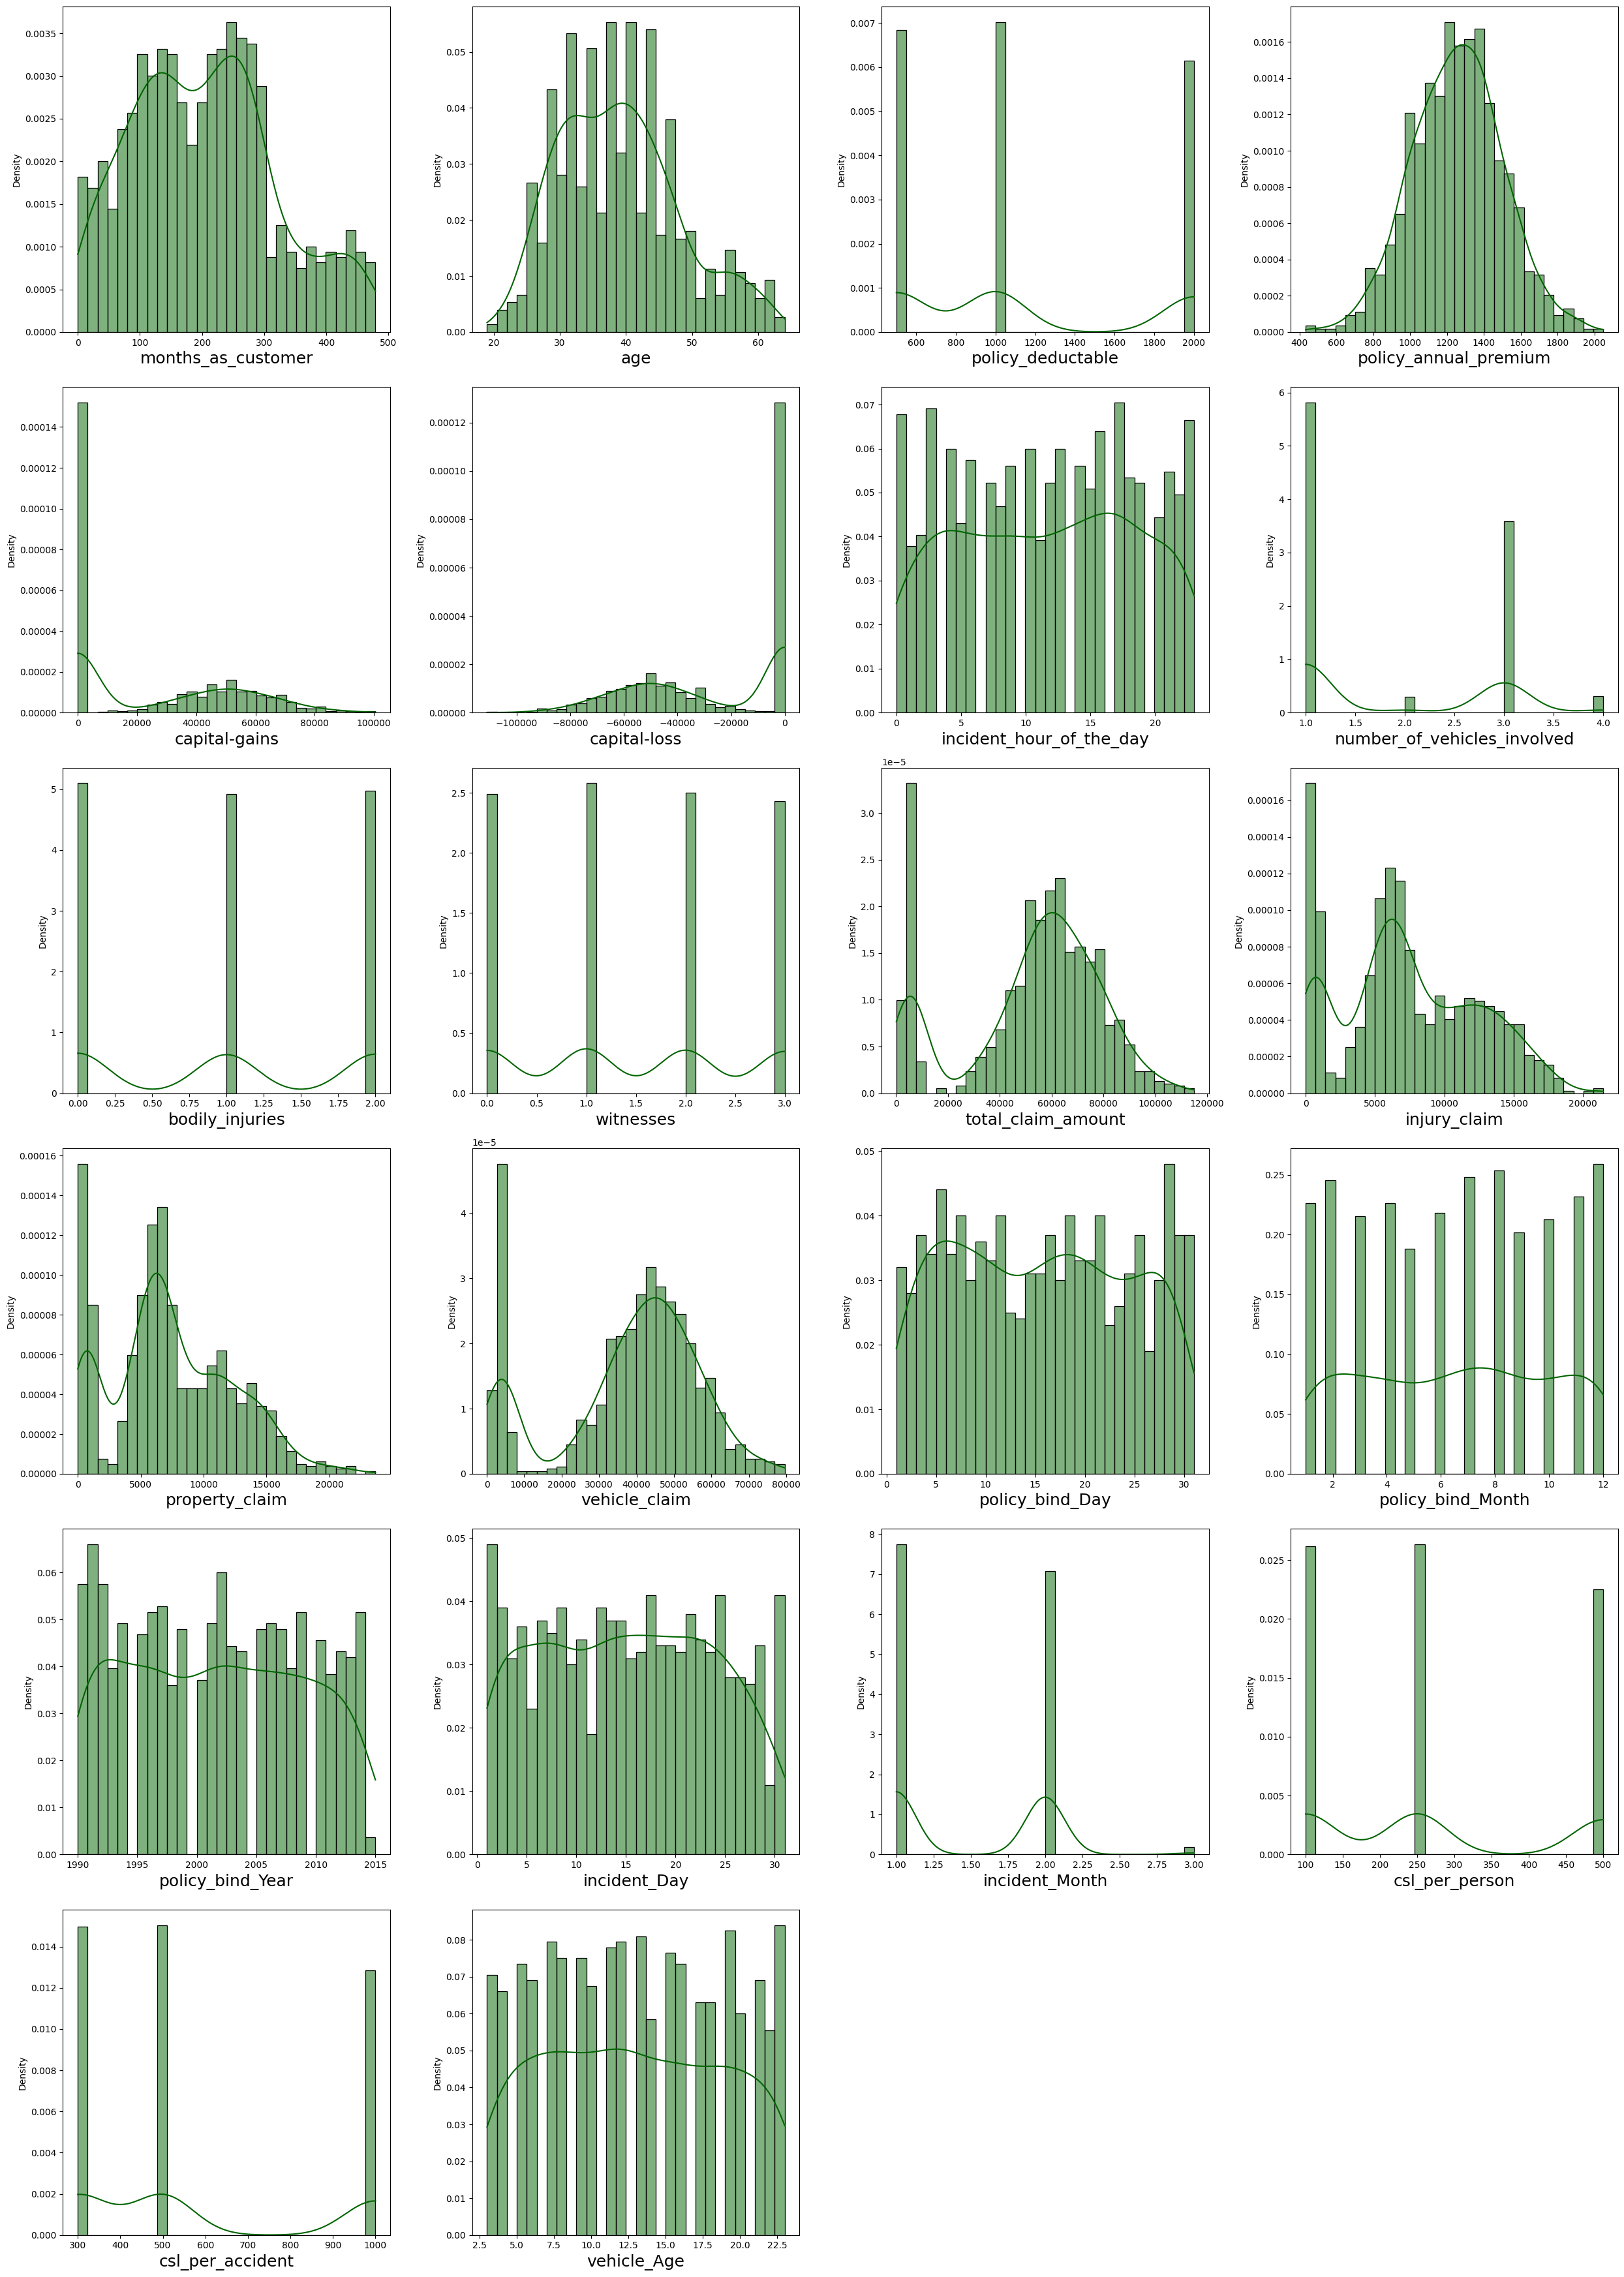

In [ ]:
# # Checking how the data has been distriubted in each column(Numerical columns)
plt.figure(figsize=(25, 35), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 23:
        plt.subplot(6, 4, plotnumber)
        sns.histplot(df[column], color="darkgreen", kde=True, stat="density", bins=30)
        plt.xlabel(column, fontsize=18)
    plotnumber += 1

plt.tight_layout()
plt.show()


<ipython-input-38-66c928341423>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud_reported', data=df, palette='Dark2')


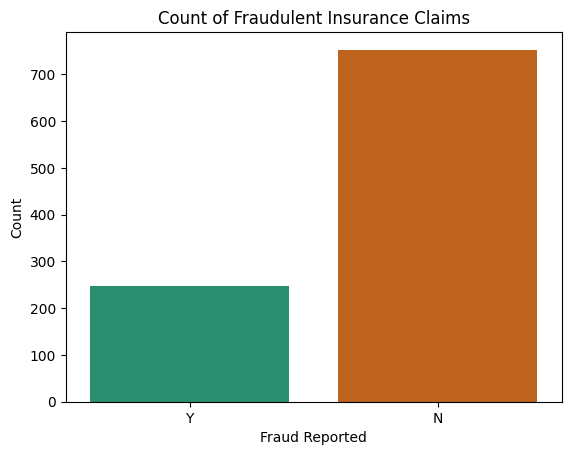

In [ ]:
# Univariate Analysis (Categorical Columns)
sns.countplot(x='fraud_reported', data=df, palette='Dark2')
plt.title('Count of Fraudulent Insurance Claims')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

# Identifying Outliers

<ipython-input-39-fbcde6dea2fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column],palette="Set2_r")
<ipython-input-39-fbcde6dea2fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column],palette="Set2_r")
<ipython-input-39-fbcde6dea2fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column],palette="Set2_r")
<ipython-input-39-fbcde6dea2fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


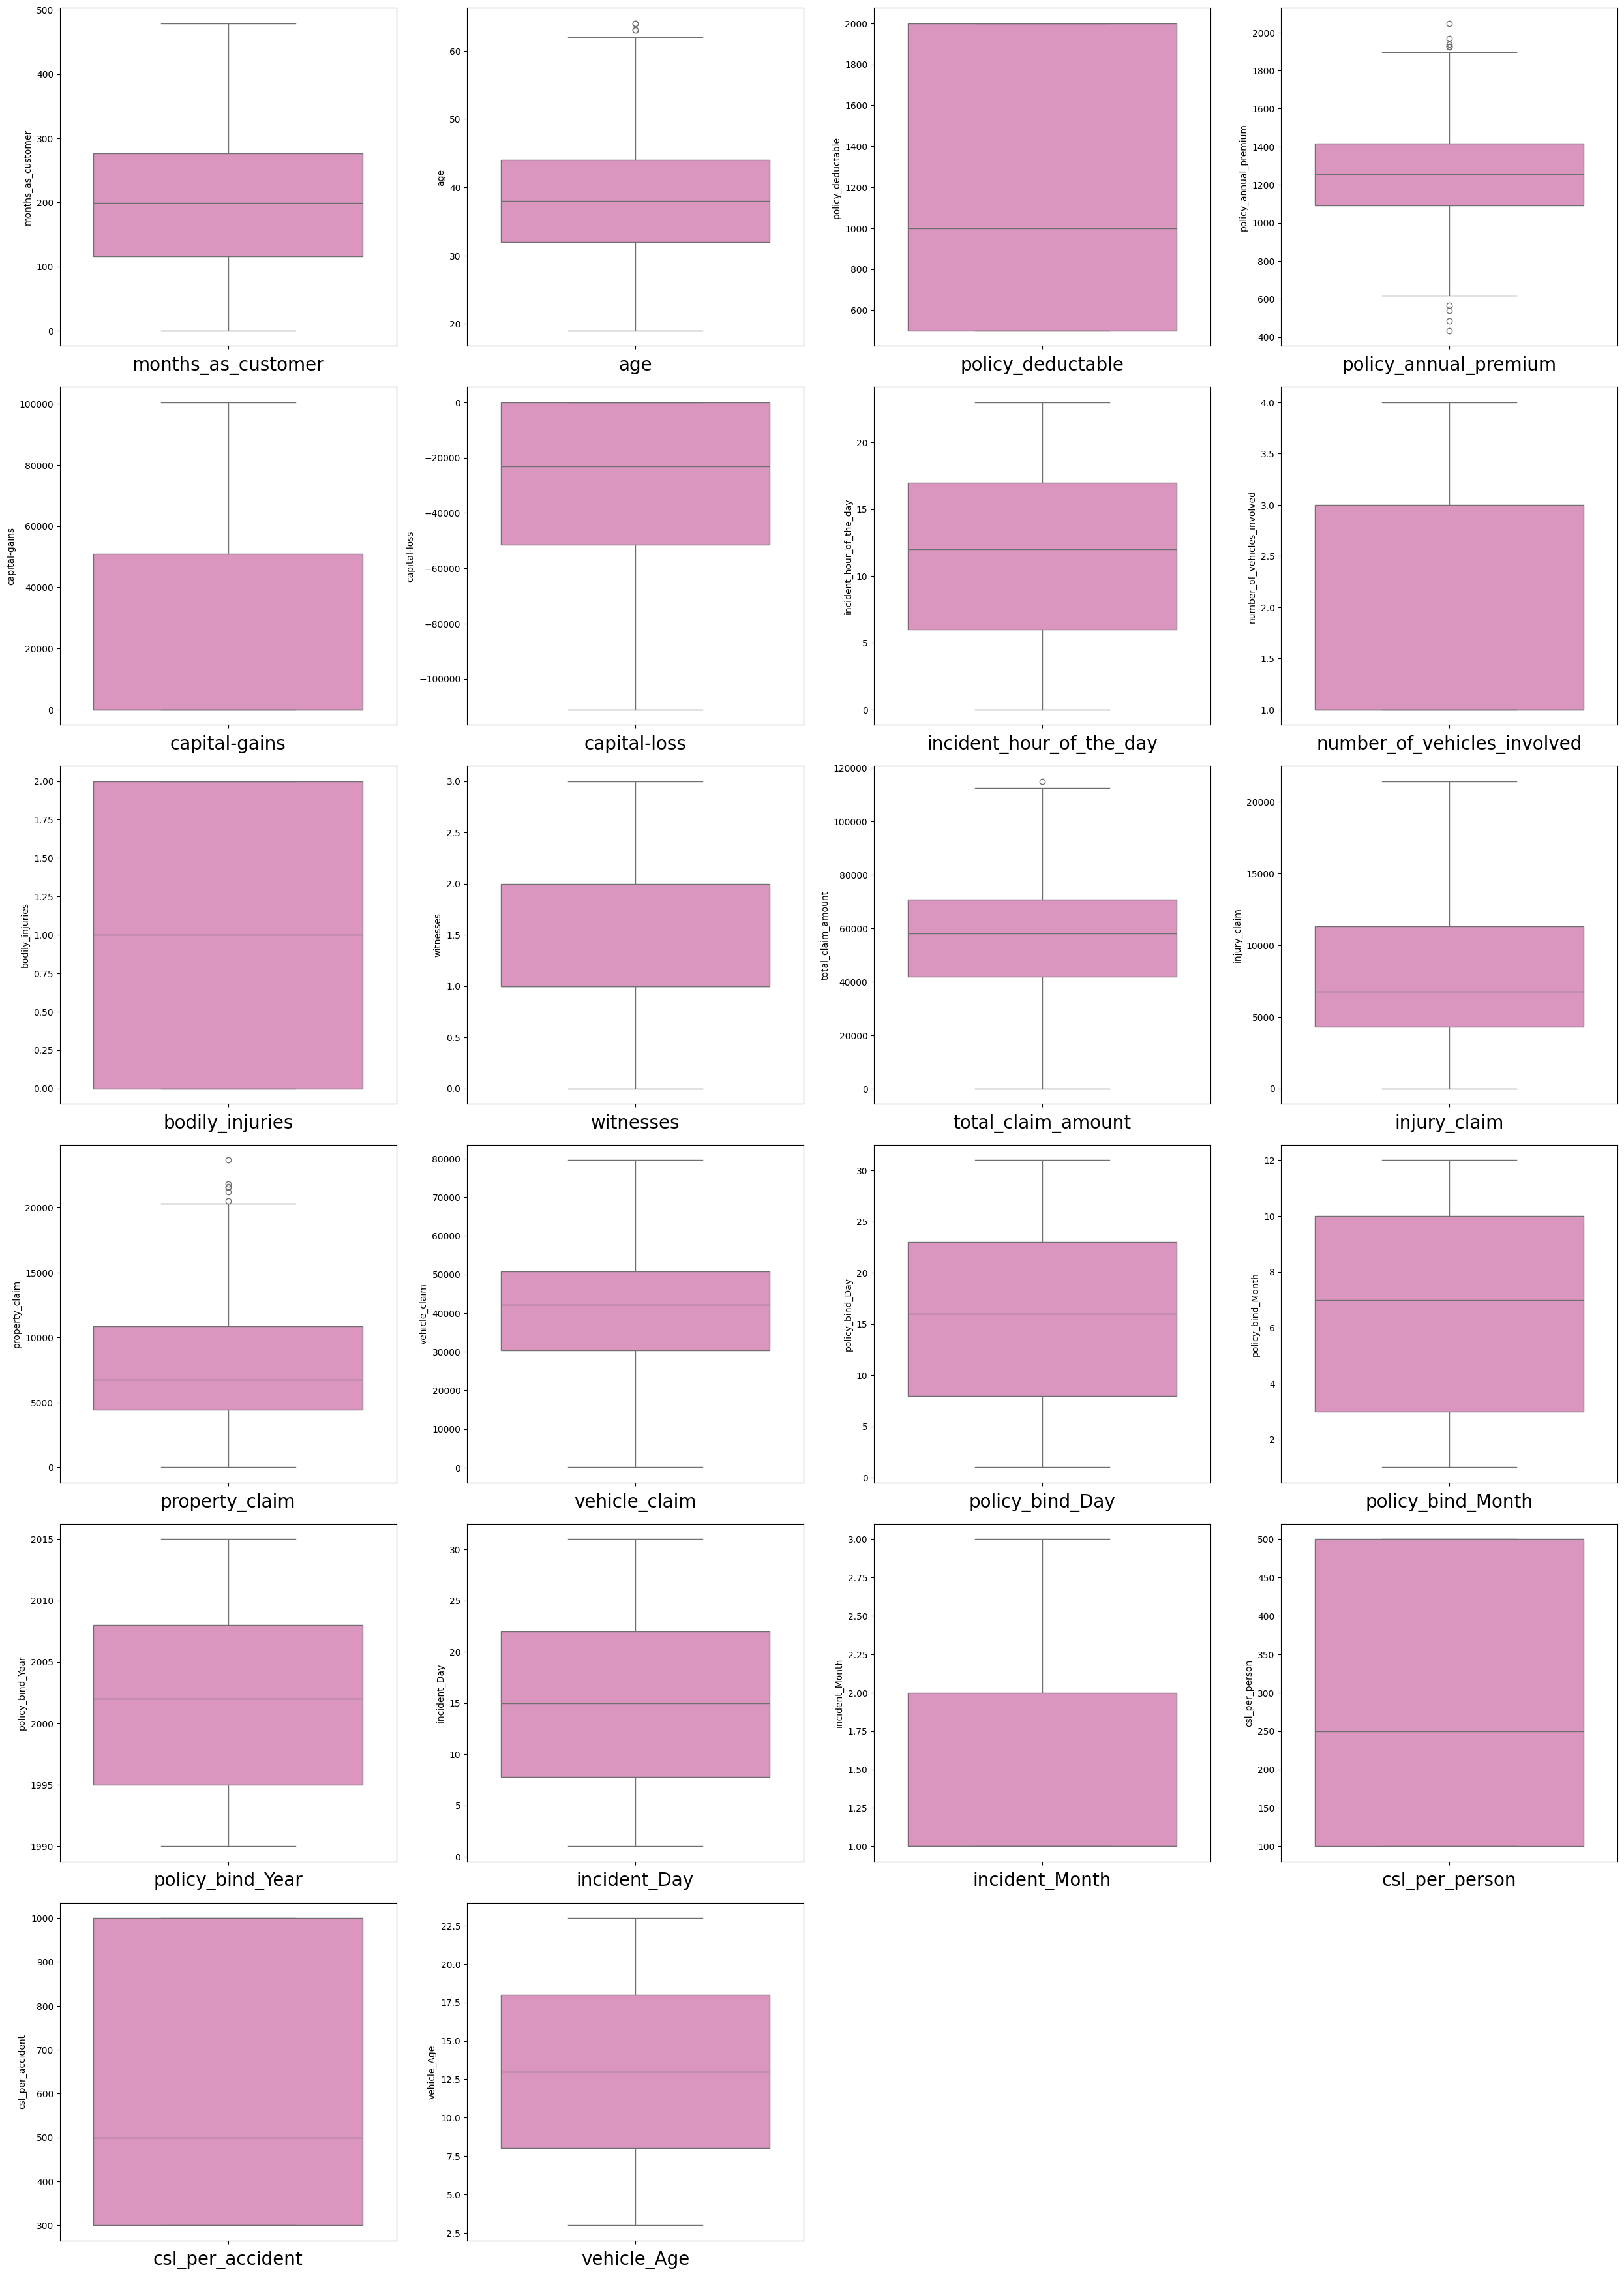

In [ ]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Processing Outliers

In [ ]:
# Feature containing outliers
features = df[['age','policy_annual_premium','total_claim_amount','property_claim','incident_Month']]

z=np.abs(zscore(features))

z

,age,policy_annual_premium,total_claim_amount,property_claim,incident_Month
0,0.990836,0.616705,0.714257,1.165505,0.947587
1,0.334073,0.242521,1.807312,1.372696,0.947587
2,1.088913,0.642233,0.686362,0.736072,0.962871
3,0.224613,0.652886,0.403135,0.219722,0.947587
4,0.552994,1.341980,1.753121,1.399654,0.962871
...,...,...,...,...,...
995,0.103769,0.222884,1.305049,0.273817,0.962871
996,0.224613,0.739141,2.111466,2.214794,0.947587
997,0.541611,0.520739,0.558507,0.020826,0.947587
998,2.523284,0.411866,0.219110,0.451976,0.962871


In [ ]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_model,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,vehicle_Age
0,328,48,OH,250/500,1000,1406.91,MALE,MD,craft-repair,sleeping,...,92x,Y,17,10,2014,25,1,250,500,14
1,228,42,IN,250/500,2000,1197.22,MALE,MD,machine-op-inspct,reading,...,E400,Y,27,6,2006,21,1,250,500,11
2,134,29,OH,100/300,2000,1413.14,FEMALE,PhD,sales,board-games,...,RAM,N,6,9,2000,22,2,100,300,11
3,256,41,IL,250/500,2000,1415.74,FEMALE,PhD,armed-forces,board-games,...,Tahoe,Y,25,5,1990,10,1,250,500,4
4,228,44,IL,500/1000,1000,1583.91,MALE,Associate,sales,board-games,...,RSX,N,6,6,2014,17,2,500,1000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,FEMALE,Masters,craft-repair,paintball,...,Accord,N,16,7,1991,22,2,500,1000,12
996,285,41,IL,100/300,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,...,Passat,N,5,1,2014,24,1,100,300,3
997,130,34,OH,250/500,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,...,Impreza,N,17,2,2003,23,1,250,500,22
998,458,62,IL,500/1000,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,...,A5,N,18,11,2011,26,2,500,1000,20


# Checking Skewness:

In [ ]:
new_df.skew().sort_values()

<ipython-input-42-6096413ea165>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.skew().sort_values()


vehicle_claim                 -0.619755
total_claim_amount            -0.593473
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
policy_bind_Month             -0.021269
bodily_injuries                0.011117
witnesses                      0.025758
policy_annual_premium          0.032042
incident_Day                   0.038514
vehicle_Age                    0.049276
policy_bind_Day                0.057251
policy_bind_Year               0.058499
incident_Month                 0.260283
injury_claim                   0.267970
property_claim                 0.357130
months_as_customer             0.359605
csl_per_person                 0.413713
policy_deductable              0.473229
age                            0.474526
capital-gains                  0.478850
number_of_vehicles_involved    0.500364
csl_per_accident               0.609316
dtype: float64

In [ ]:
# Processing skewness
skew = ["total_claim_amount","vehicle_claim","incident_Month","csl_per_accident"]

transf = PowerTransformer(method='yeo-johnson')

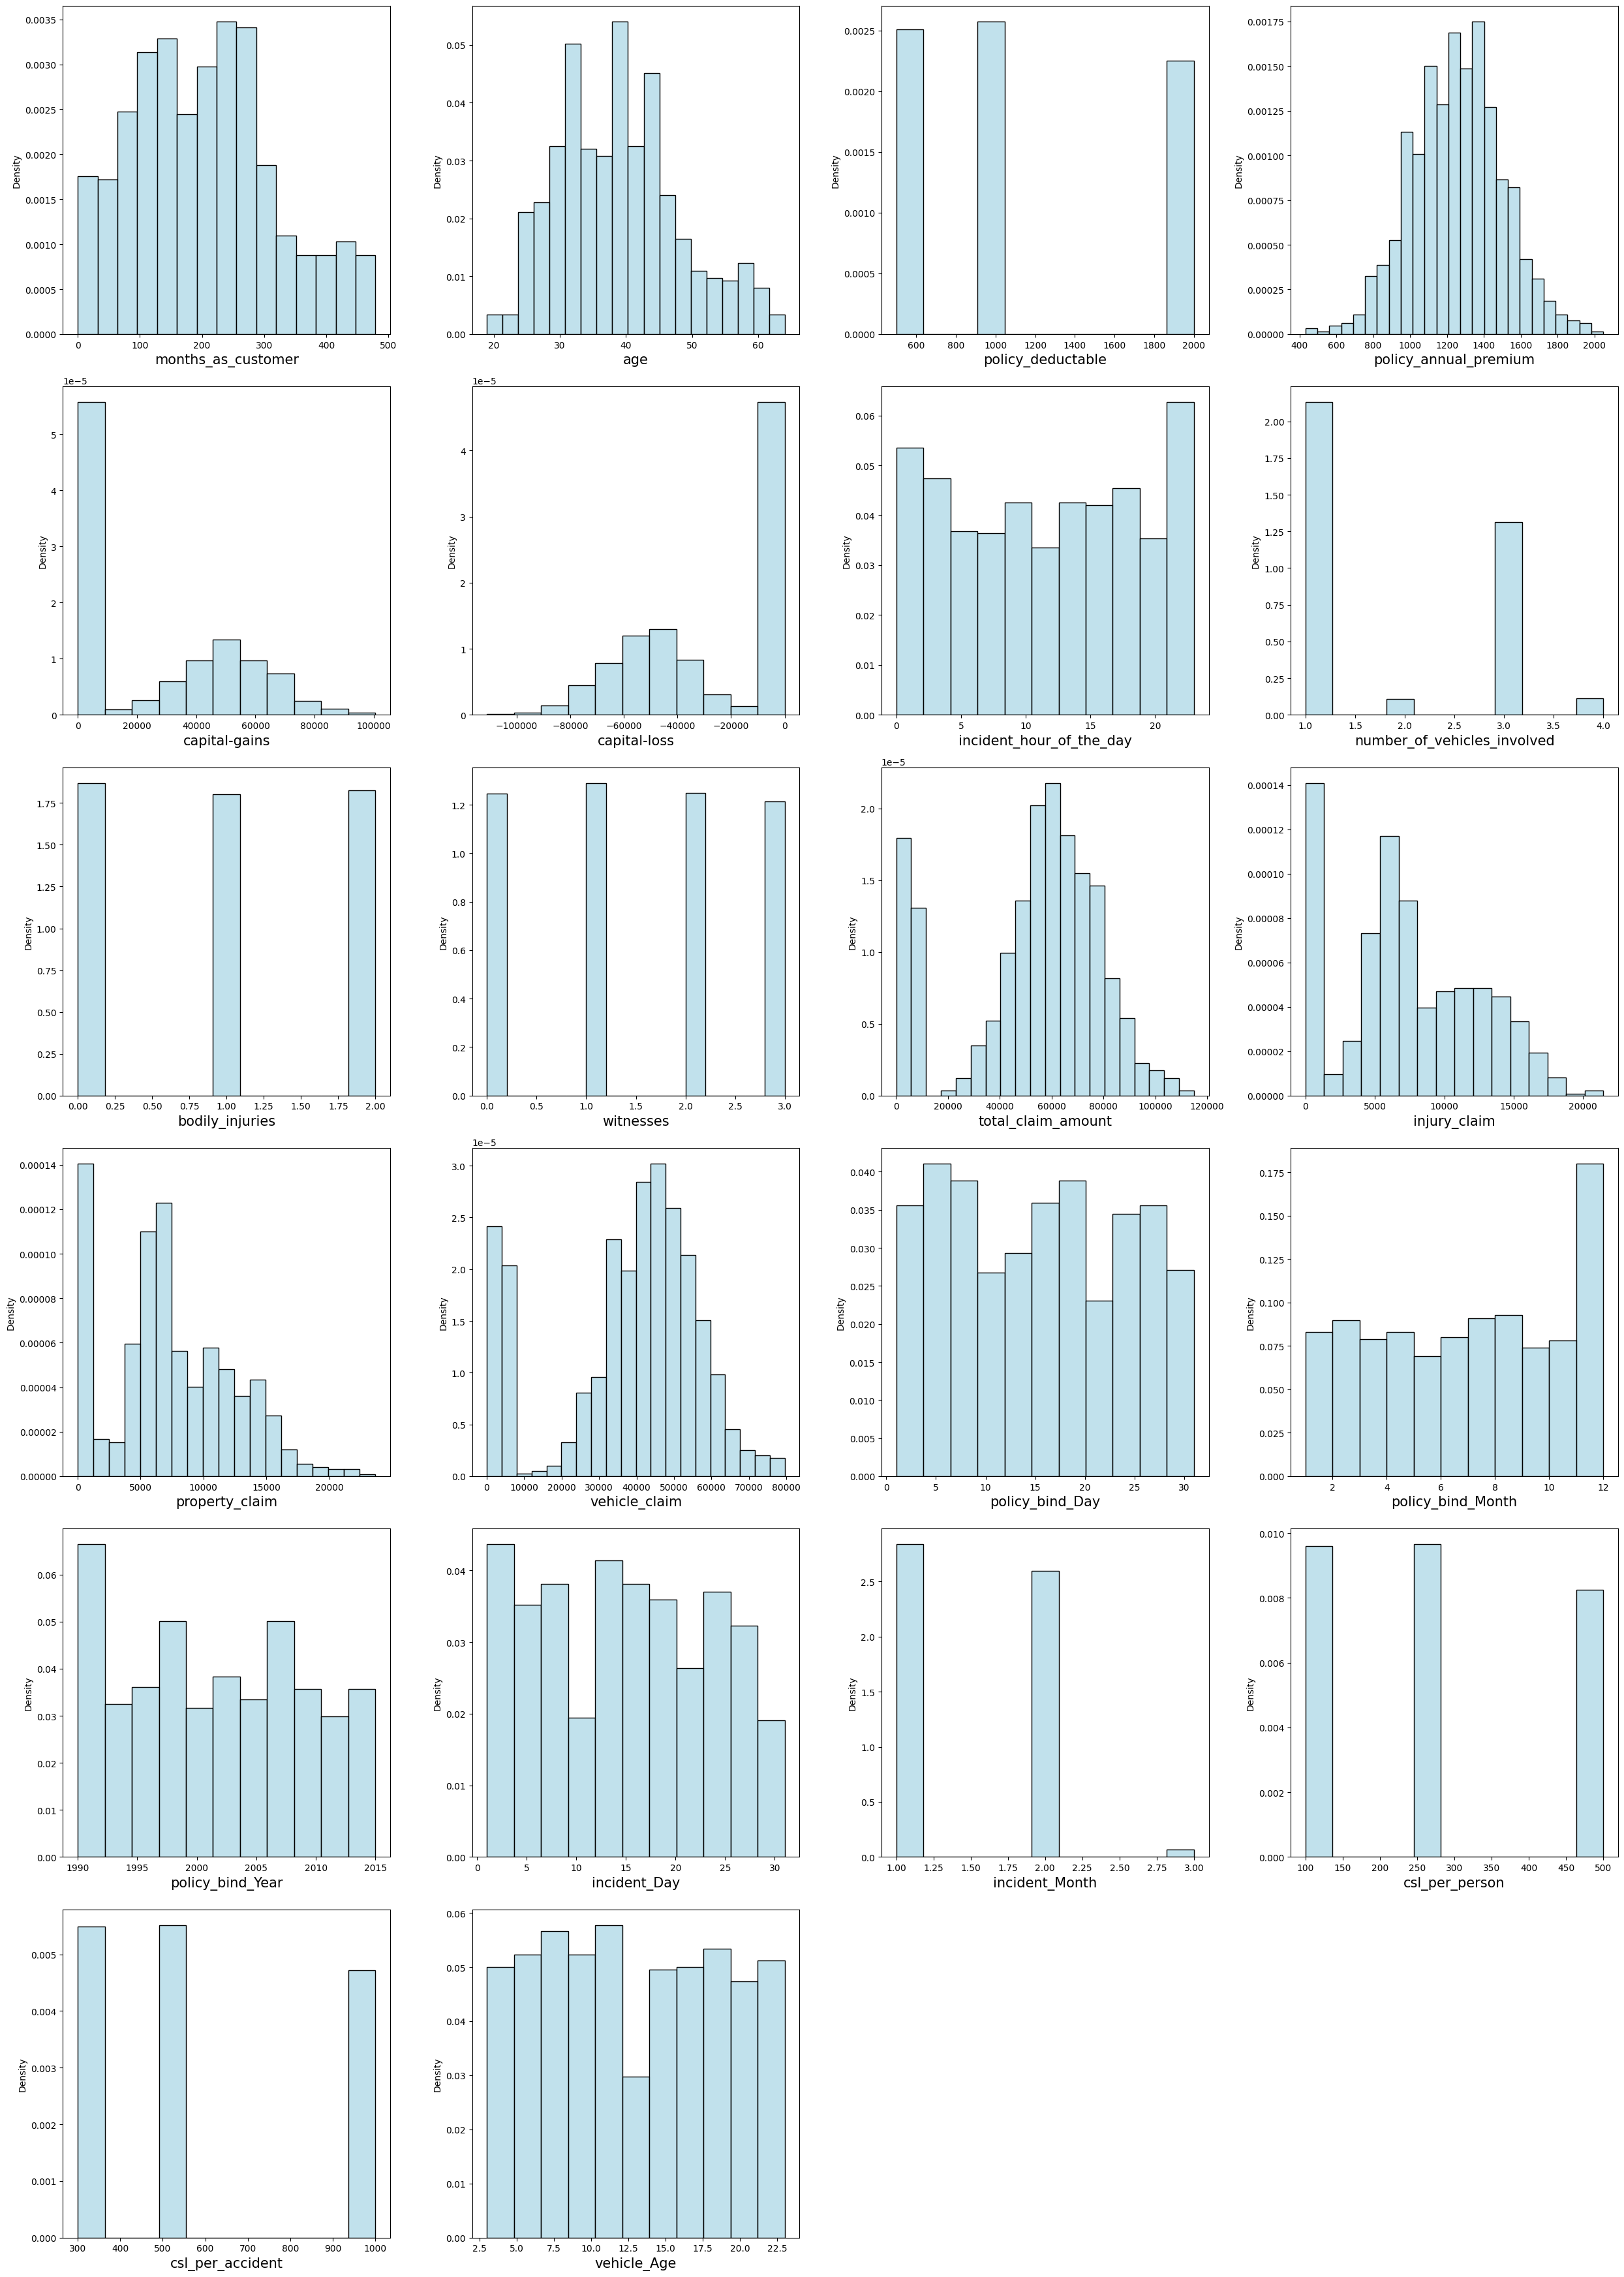

In [ ]:
#
plt.figure(figsize=(25, 35), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 23:
        ax = plt.subplot(6, 4, plotnumber)
        sns.histplot(df[column], color="darkblue" and "lightblue", stat="density", kde_kws={"shade": True})
        plt.xlabel(column, fontsize=15)
    plotnumber += 1

plt.tight_layout()
plt.show()

# Encoding categorical columns using Label Encoding

In [ ]:
LE = LabelEncoder()
new_df = new_df.copy()
new_df.loc[:, categorical_col] = new_df.loc[:, categorical_col].apply(LE.fit_transform)

<ipython-input-45-186b65585d5f>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, categorical_col] = new_df.loc[:, categorical_col].apply(LE.fit_transform)


In [ ]:
new_df[categorical_col].head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2,1,1,4,2,17,0,2,2,0,4,4,1,1,1,10,1,1
1,1,1,1,4,6,15,2,3,1,1,4,5,5,0,0,8,12,1
2,2,0,0,6,11,2,3,0,1,1,4,1,1,0,0,4,30,0
3,0,1,0,6,1,2,4,2,0,0,4,2,0,0,0,3,34,1
4,0,2,1,0,11,2,4,3,1,1,2,1,0,0,0,0,31,0


<ipython-input-47-c5b96e44a697>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
<ipython-input-47-c5b96e44a697>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper_triangle = np.triu(df.corr())
<ipython-input-47-c5b96e44a697>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f',


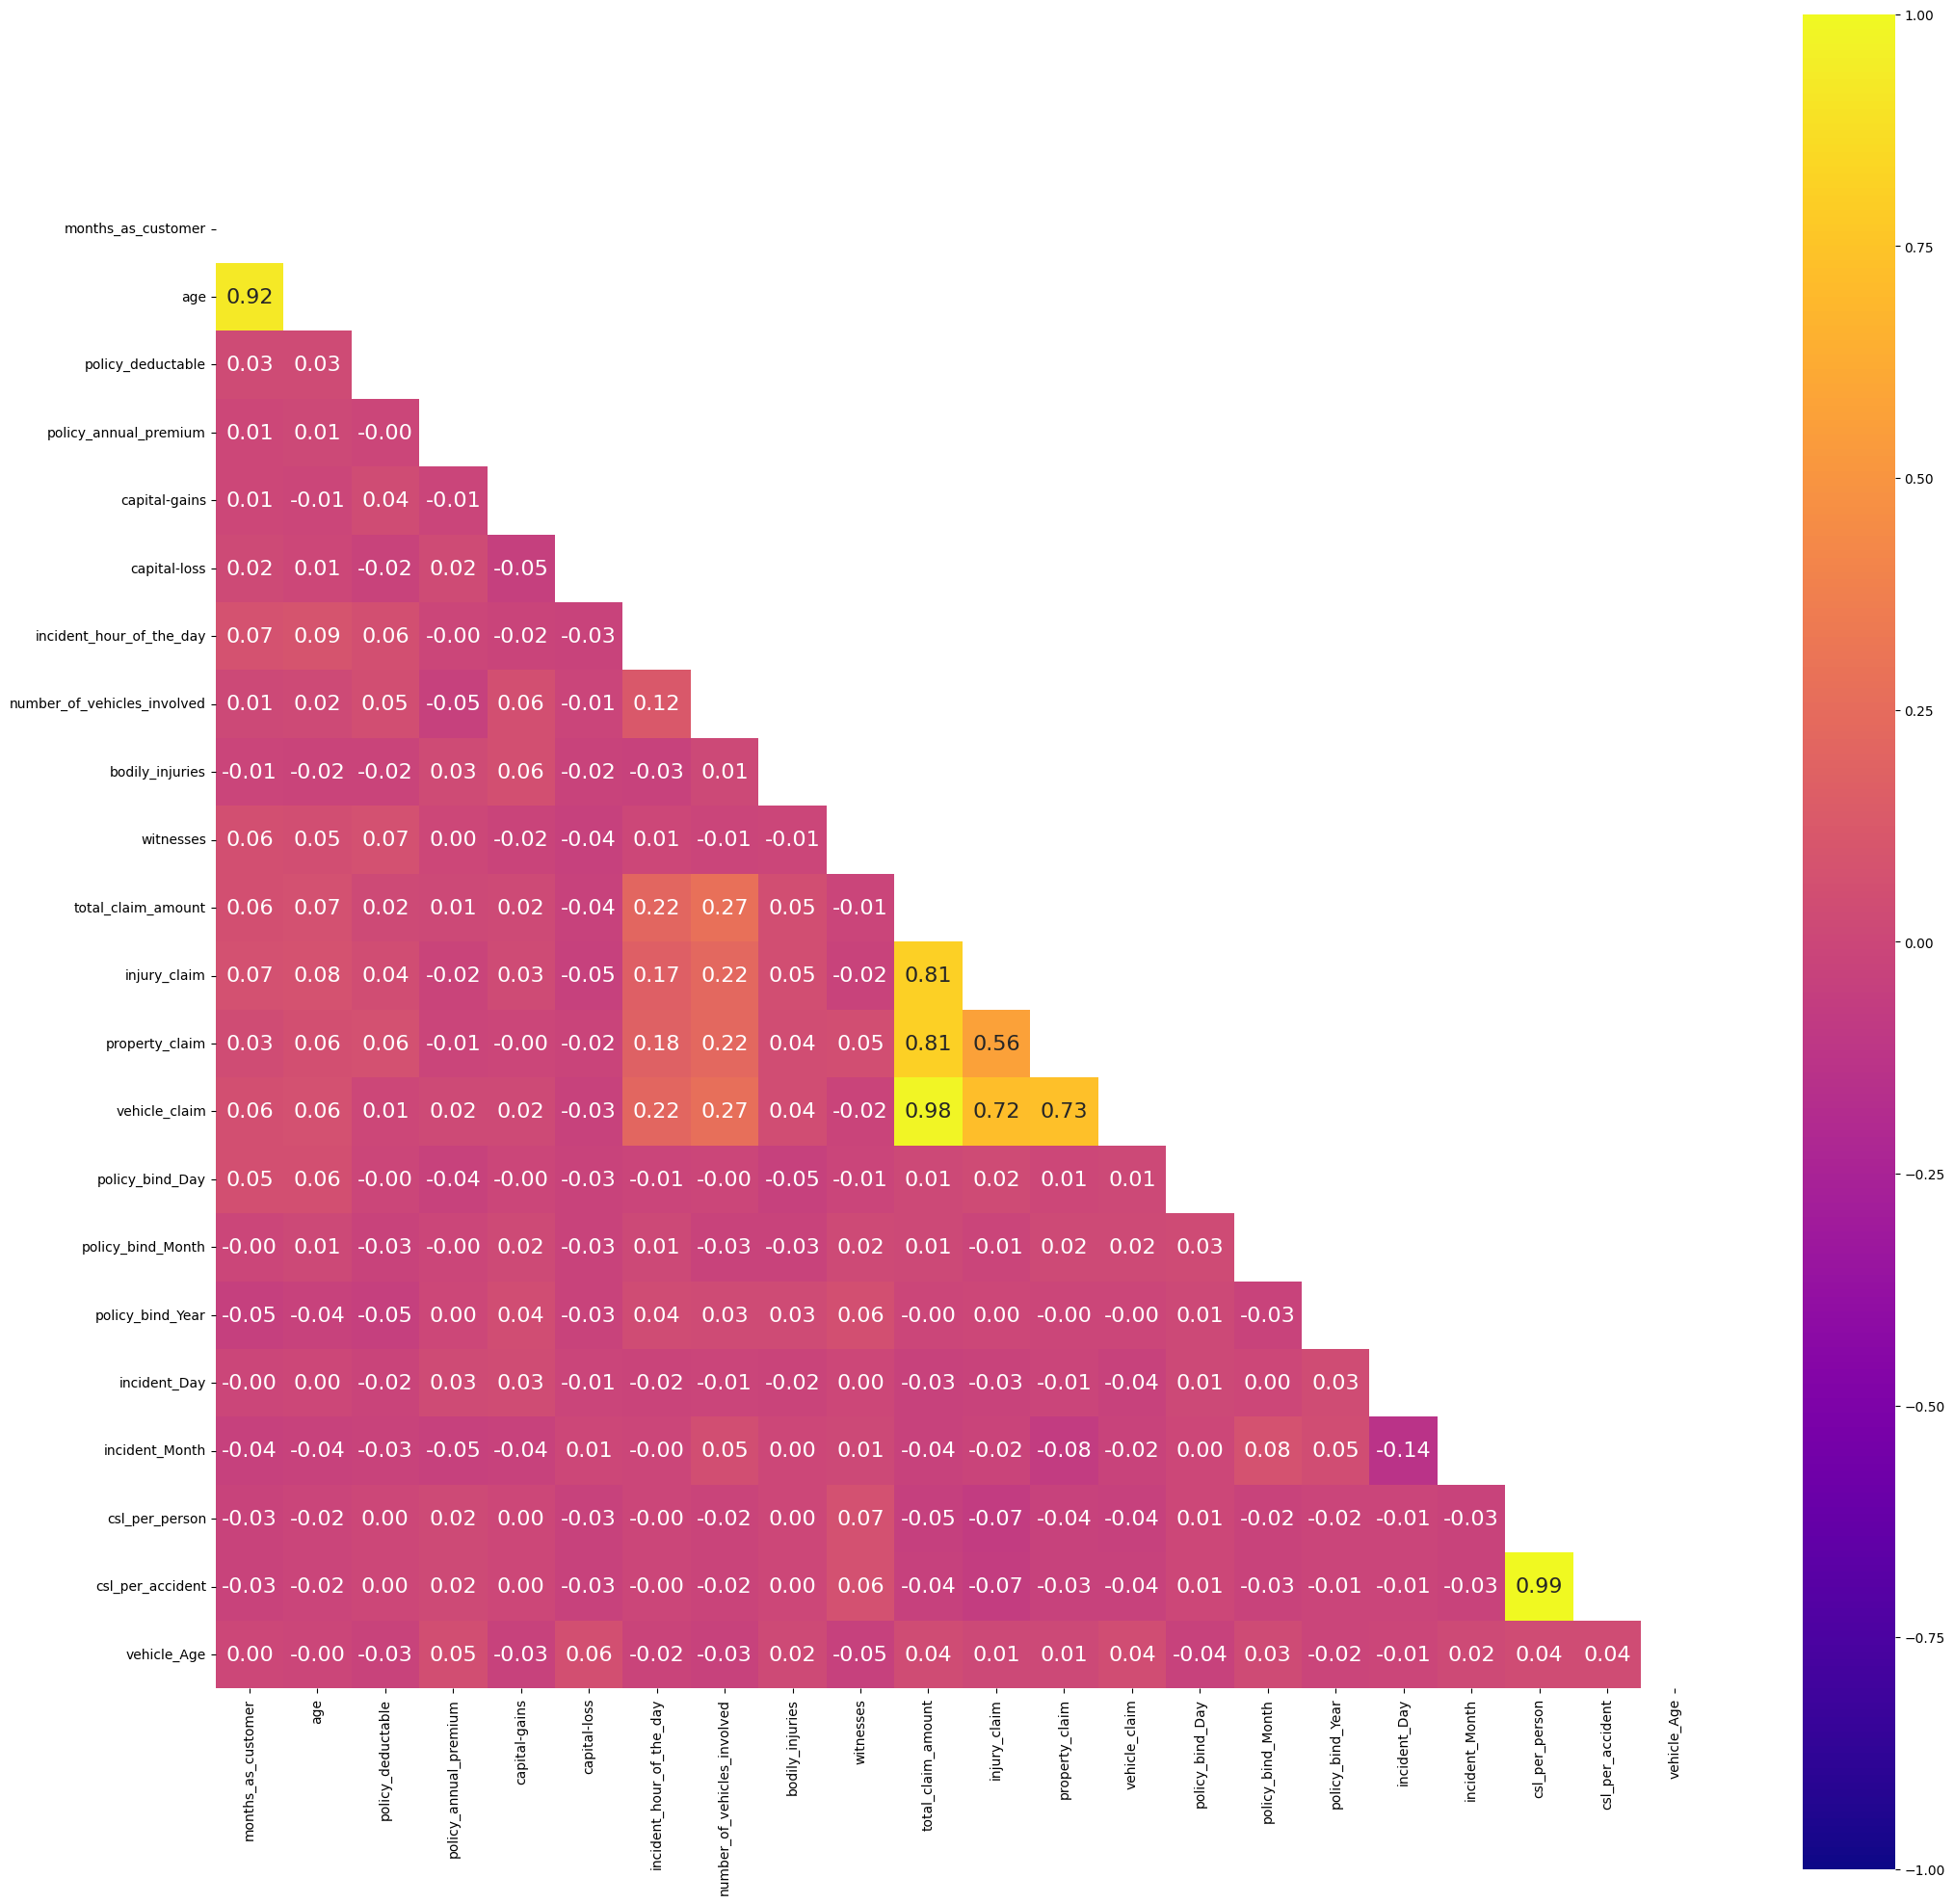

In [ ]:
# Visualizing the correlation matrix by plotting heat map.
plt.style.use('seaborn-pastel')
numeric_columns = df.select_dtypes(include=np.number)
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f',
            annot_kws={'size':16}, cmap="plasma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Spliting dataset into Feature and Traget

In [ ]:
X = new_df.drop('fraud_reported',axis=1)
y = new_df['fraud_reported']

In [ ]:
# Dimension of X
X.shape

(996, 39)

In [ ]:
# Dimension of y
y.shape

(996,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Use StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Smote

In [ ]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [ ]:
# Checking value count of target column
y.value_counts()


1    750
0    750
Name: fraud_reported, dtype: int64

<ipython-input-54-0272fa341651>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraud_reported', y='count', data=value_counts_df, palette="Dark2")


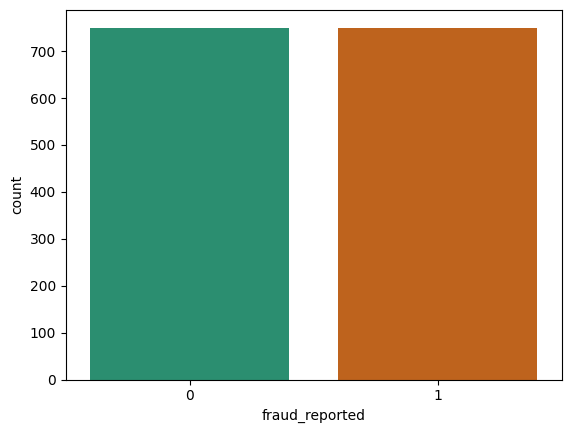

In [ ]:
# Visualizing the data after oversampling
# Assuming y is a pandas Series
value_counts = y.value_counts()

# Convert index to a column in a DataFrame
value_counts_df = pd.DataFrame({'fraud_reported': value_counts.index, 'count': value_counts.values})

# Visualizing the data after oversampling
sns.barplot(x='fraud_reported', y='count', data=value_counts_df, palette="Dark2")
plt.show()

#Creating Functions for Classifer Models

In [ ]:
# Creating a function to run the classifier models
def run_classifier(X, y, model):
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the model
    model.fit(X_train, y_train)

    # Predicting with the model
    pred = model.predict(X_test)

    # Accuracy Score
    acc_score = accuracy_score(y_test, pred) * 100
    print("Accuracy Score:", acc_score)

    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)




# Selection of Alogrithms

In [ ]:
## ALGORITHMS:-
# Logistic Regression
# Decision Tree
# Xgboost

# Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_score = accuracy_score(y_test, pred) * 100
print("Accuracy Score:", acc_score)
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)

Accuracy Score: 76.0

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       153
           1       0.48      0.30      0.37        47

    accuracy                           0.76       200
   macro avg       0.64      0.60      0.61       200
weighted avg       0.73      0.76      0.74       200



# Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_score = accuracy_score(y_test, pred) * 100
print("Accuracy Score:", acc_score)
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)

Accuracy Score: 79.5

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       153
           1       0.56      0.62      0.59        47

    accuracy                           0.80       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.80      0.80      0.80       200



# Xgboost

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_score = accuracy_score(y_test, pred) * 100
print("Accuracy Score:", acc_score)
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)

Accuracy Score: 81.0

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       153
           1       0.60      0.57      0.59        47

    accuracy                           0.81       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.81      0.81      0.81       200



# Confusion Matrix

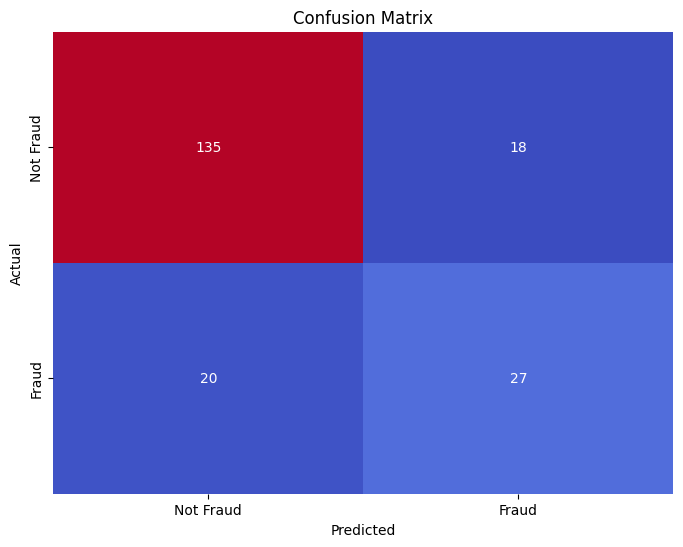

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test,pred)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Comparision Table

In [ ]:
# Define the models
models = {
    "XGBoost": xgb.XGBClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression()
}

# Create an empty list to store DataFrames for each model
dfs = []

# Loop through each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Calculate metrics
    acc_score = accuracy_score(y_test, pred) * 100
    class_report = classification_report(y_test, pred, output_dict=True)

    # Extract metrics for class 1
    precision_1 = class_report['1']['precision']
    recall_1 = class_report['1']['recall']
    f1_1 = class_report['1']['f1-score']

    # Create a DataFrame for the current model
    model_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [acc_score],
        'Precision (1)': [precision_1],
        'Recall (1)': [recall_1],
        'F1-score (1)': [f1_1]
    })

    # Append the DataFrame to the list
    dfs.append(model_df)

# Concatenate all DataFrames into a single DataFrame
results_df = pd.concat(dfs, ignore_index=True)

# Print the comparison table
print(results_df)

                Model  Accuracy  Precision (1)  Recall (1)  F1-score (1)
0             XGBoost      81.0       0.600000    0.574468      0.586957
1        DecisionTree      77.5       0.520000    0.553191      0.536082
2  LogisticRegression      76.0       0.482759    0.297872      0.368421


# Conclusion

As per the above comparision table based on the provided metrics, XGBoost outperforms both Decision Tree and Logistic Regression with the highest accuracy of 81.0% and well-balanced precision, recall, and F1-score for predicting auto insurance claims. Therefore, XGBoost is recommended as the preferred model for this specific task.

# Thank You